In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import importlib

required_libs = ['numpy', 'pandas', 'scipy', 'sklearn', 'statsmodels', 'xgboost',
                 'matplotlib', 'seaborn', 'missingno',
                 'holidays', 'pyarrow', 'openpyxl',
                 'boto3', 'wget', 'zipfile', 'graphviz']
for lib in required_libs:
    try:
        importlib.import_module(lib)
        print(f'{lib} is already installed', flush=True)
    except ImportError:
        try:
            print(f'Install {lib}', flush=True)
            os.system(f'pip3 install {lib}')
        except:
            print(f'Failed to install {lib}', flush=True)

numpy is already installed
pandas is already installed
scipy is already installed
sklearn is already installed
statsmodels is already installed
xgboost is already installed
matplotlib is already installed
seaborn is already installed
missingno is already installed
holidays is already installed
pyarrow is already installed
openpyxl is already installed
boto3 is already installed
wget is already installed
zipfile is already installed
graphviz is already installed


In [ ]:
import pandas as pd
# 파일 불러오기
df = pd.read_csv("KPU_DATA_MERGE1.csv", encoding="euc-kr") 
df.columns

# ACPT_YM 날짜형식 바꾸기
import pandas as pd

def transform_datetype(df):
    df['ACPT_YM'] = df['ACPT_YM'].astype('str')
    df['ACPT_YM'] = df['ACPT_YM'] + '01'
    df['ACPT_YM'] = pd.to_datetime(df['ACPT_YM'])
    df['ACPT_YM'] = df['ACPT_YM'].dt.strftime('%Y-%m-%d') # https://jimmy-ai.tistory.com/156
    return df


df = transform_datetype(df)
df.head(10)
print(len(df))

# 각 월별 데이터 길이 차이 확인
A = df.loc[df['ACPT_YM']=='2019-01-01']
B = df.loc[df['ACPT_YM']=='2020-08-01']

print(len(A))
print(len(B))


# 고성경찰서, 교통과, 제주경찰청 삭제 * 데이터 에러 및 불충분 
df = df.drop(index=df.loc[df['PLCST_NM'] == '고성경찰서'].index)
df = df.drop(index=df.loc[df['PLCST_NM'] == '교통과'].index)
df = df.drop(index=df.loc[df['PLCST_NM'] == '제주경찰청'].index)
print("고성경찰서 ,교통과, 제주경찰청 삭제 후",len(df))

8465
228
235
고성경찰서 ,교통과, 제주경찰청 삭제 후 8404


In [ ]:
# 경찰서 이름 리스트 * 중복제거
df_plcst_nm = df['PLCST_NM']
plsct_nm_list = df_plcst_nm.to_list()
plsct_nm_list = list(set(plsct_nm_list))

In [ ]:
plsct_nm_list

['서울도봉경찰서',
 '오산경찰서',
 '장흥경찰서',
 '나주경찰서',
 '안성경찰서',
 '부산연제경찰서',
 '거창경찰서',
 '용인동부경찰서',
 '서울용산경찰서',
 '금천경찰서',
 '청주상당경찰서',
 '안동경찰서',
 '의왕경찰서',
 '인천논현경찰서',
 '부산경찰청',
 '전라남도경찰청',
 '보성경찰서',
 '서울수서경찰서',
 '군포경찰서',
 '함안경찰서',
 '부산진경찰서',
 '고양경찰서',
 '서울강동경찰서',
 '동부경찰서',
 '곡성경찰서',
 '대구중부경찰서',
 '강원경찰청',
 '대전서부경찰서',
 '순창경찰서',
 '부여경찰서',
 '부천오정경찰서',
 '인천부평경찰서',
 '합천경찰서',
 '경기남부경찰청',
 '양산경찰서',
 '함양경찰서',
 '서울중랑경찰서',
 '청주청원경찰서',
 '대구성서경찰서',
 '대구북부경찰서',
 '춘천경찰서',
 '천안동남경찰서',
 '광주경찰청',
 '안양만안경찰서',
 '김해서부경찰서',
 '이천경찰서',
 '횡성경찰서',
 '함평경찰서',
 '의령경찰서',
 '문경경찰서',
 '서울광진경찰서',
 '경산경찰서',
 '대구달서경찰서',
 '김천경찰서',
 '기장경찰서',
 '구리경찰서',
 '창녕경찰서',
 '대전경찰청',
 '경찰청',
 '수원중부경찰서',
 '서울강북경찰서',
 '부산중부경찰서',
 '서대문경찰서',
 '평택경찰서',
 '광명경찰서',
 '대전유성경찰서',
 '순천경찰서',
 '서울양천경찰서',
 '울산중부경찰서',
 '괴산경찰서',
 '동해경찰서',
 '진해경찰서',
 '창원중부경찰서',
 '부산북부경찰서',
 '대구수성경찰서',
 '정선경찰서',
 '금산경찰서',
 '장성경찰서',
 '포항남부경찰서',
 '남해경찰서',
 '양구경찰서',
 '광주동부경찰서',
 '음성경찰서',
 '서천경찰서',
 '서울혜화경찰서',
 '청양경찰서',
 '의정부경찰서',
 '청도경찰서',
 '태안경찰서',
 '일산동부경찰서',
 '분당경찰서',
 '대구강북경찰서',
 '논산경

In [ ]:
# 년도 + 월 데이터 리스트로 담기 * 중복제거 
df_yymm = df['ACPT_YM']
yymm_list = df_yymm.to_list()
yymm_list = list(set(yymm_list))

In [ ]:
yymm_list.sort()

In [ ]:
yymm_list

['2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-01',
 '2019-08-01',
 '2019-09-01',
 '2019-10-01',
 '2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01',
 '2021-06-01',
 '2021-07-01',
 '2021-08-01',
 '2021-09-01',
 '2021-10-01',
 '2021-11-01',
 '2021-12-01']

In [ ]:
#time_list = ['TIZN_1']
#day_list = ['OCRN_DOTW_SNDD']
time_list = ['TIZN_1','TIZN_2','TIZN_3','TIZN_4']
day_list = ['OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT']

In [ ]:
df['TIZN_1_PREDICT'] = 0
df['TIZN_2_PREDICT'] = 0
df['TIZN_3_PREDICT'] = 0
df['TIZN_4_PREDICT'] = 0
df['OCRN_DOTW_SNDD_PREDICT'] = 0
df['OCRN_DOTW_MON_PREDICT'] = 0
df['OCRN_DOTW_TUE_PREDICT'] = 0
df['OCRN_DOTW_WED_PREDICT'] = 0
df['OCRN_DOTW_THU_PREDICT'] = 0
df['OCRN_DOTW_FRI_PREDICT'] = 0
df['OCRN_DOTW_SAT_PREDICT'] = 0


df['TIZN_1_rmse'] = 0
df['TIZN_2_rmse'] = 0
df['TIZN_3_rmse'] = 0
df['TIZN_4_rmse'] = 0
df['OCRN_DOTW_SNDD_rmse'] = 0
df['OCRN_DOTW_MON_rmse'] = 0
df['OCRN_DOTW_TUE_rmse'] = 0
df['OCRN_DOTW_WED_rmse'] = 0
df['OCRN_DOTW_THU_rmse'] = 0
df['OCRN_DOTW_FRI_rmse'] = 0
df['OCRN_DOTW_SAT_rmse'] = 0


In [ ]:
df4test = df.groupby(['ACPT_YM']).mean()

In [ ]:
df4test = df4test[['RPRT_CASCNT_WHOL']]

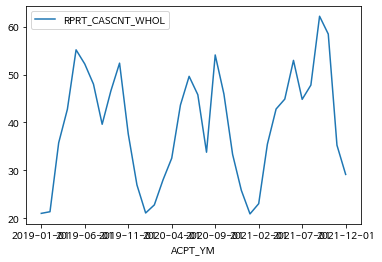

In [ ]:
df4test
df4test.plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [ ]:
# [2] 시계열 정상성 확인 - ADF 테스트
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(df4test)

ADF TEST 결과
ADF Statistics: -0.618565
p-value: 0.866732
num of lags: 10.000000
num of observations: 25.000000
Critical values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


ADF Statistics: -6.671331
p-value: 0.000000
num of lags: 9.000000
num of observations: 25.000000
Critical values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


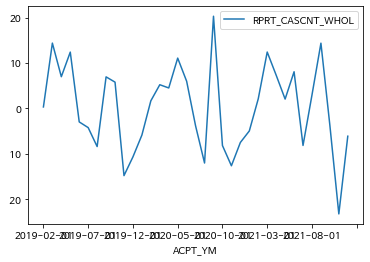

In [ ]:
# [3] 시계열 정상성 확인 - ADF 테스트 후 '차분'하며 정상성 데이터로 만들기
dff1 = df4test.diff().dropna()
dff1.plot()

# 차분 후 다시 ADF 테스트를 하며 시계열 데이터의 정상성 확인 
adf_test(dff1)
# (해석) 1차 차분 후 p-value < 0.05 이므로 귀무가설(비정상성) 기각 -> 데이터의 정상성 확인

In [ ]:
# [4] ARIMA(p,d,q) 모수(모집단의 대표값) 추정
# AR(p), 차분(d), MA(q)에서 보통 p+q <2, p*q=0 인 값을 많이 사용한다. (p,q둘 중 한 값이 0)
#추정방법?
#1) ACF PLOT, PACF PLOT 2) pmdarima 라이브러리의 ndiffs, auto_arima 함수사용하여 모수 추정
#여기선?
#auto_arima 함수 사용하여 모수 추정할 예정
import pmdarima as pm

model = pm.auto_arima(
            y=df4test,
            d=1, 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True)
#(해석) 가장 AIC 점수가 낮은 Best model: ARIMA(0,1,0)(0,0,0)로 확인됨

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.276, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=262.161, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=261.493, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=259.297, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=263.101, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.362 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -128.648
Date:                Sat, 10 Dec 2022   AIC                            259.297
Time:                        23:48:34   BIC                            260.852
Sample:                    01-01-2019   HQIC                           259.834
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        91.2376     24.574      3.713      0.000      43.073     139.402
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.27   Pr

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


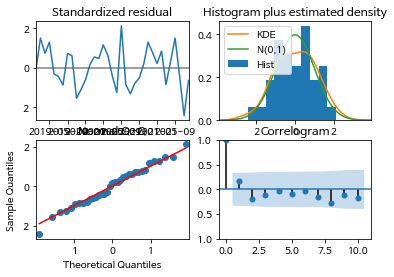

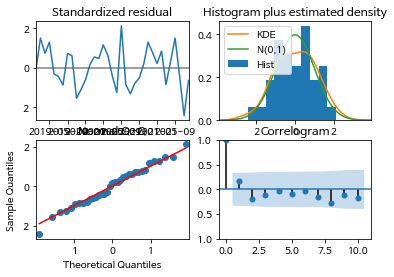

In [ ]:
# [5] 잔차 검정
# 잔차가 정상성(백색잡음인지), 정규성, 등분산성 등을 만족하는지 파악
# HOW? model.summary(), model.plot_diagnostics()
print(model.summary())
# [해석] 잔차가 자기상관을 가지지 않는 백색잡음이며 시계열 모형에 잘 적합되었음 * Ljung-Box (L1) (Q): 0.51

model.plot_diagnostics()
# (해석) 
# 1) (좌상단/Standardized Residual) : 잔차의 정상성. 잔차의 시계열 데이터 - 잔차의 시계열이 평균 0을 중심으로 변동
# 2) (우하단/Correlogram)): 잔차에 대한 ACF 플롯. 어느정도 허용 범위(파란박스) 안에 위치하여 자기 상관이 없음을 알 수 있음
# 3) (우상단/Histogram Plus Estimated Density) : 잔차의 히스토그램을 그려 정규분포(N(0,1))와 밀도를 추정한 그래프
# 4) (좌하단/Normal Q-Q) : 양 끝쪽빨간선을 벗어나는 구간이 존재하는데. 정규성을 만족하려면 빨간 일직선 위에 점들이 분포해야함

In [ ]:
df_byday1 = df[['TIZN_1']]
df_byday2 = df[['TIZN_2']]
df_byday3 = df[['TIZN_3']]
df_byday4 = df[['TIZN_4']]
df_byday5 = df[['OCRN_DOTW_SNDD']]
df_byday6 = df[['OCRN_DOTW_MON']]
df_byday7 = df[['OCRN_DOTW_TUE']]
df_byday8 = df[['OCRN_DOTW_WED']]
df_byday9 = df[['OCRN_DOTW_THU']]
df_byday10 = df[['OCRN_DOTW_FRI']]
df_byday11 = df[['OCRN_DOTW_SAT']]

In [ ]:
def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

In [ ]:
adf_test(df_byday1)
adf_test(df_byday2)
adf_test(df_byday3)
adf_test(df_byday4)
adf_test(df_byday5)
adf_test(df_byday6)
adf_test(df_byday7)
adf_test(df_byday8)
adf_test(df_byday9)
adf_test(df_byday10)
adf_test(df_byday11)

ADF Statistics: -7.537206
p-value: 0.000000
num of lags: 37.000000
num of observations: 8366.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -9.671849
p-value: 0.000000
num of lags: 37.000000
num of observations: 8366.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -10.911970
p-value: 0.000000
num of lags: 37.000000
num of observations: 8366.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -10.100424
p-value: 0.000000
num of lags: 34.000000
num of observations: 8369.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -8.560688
p-value: 0.000000
num of lags: 37.000000
num of observations: 8366.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -8.802811
p-value: 0.000000
num of lags: 37.000000
num of observations: 8366.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistics: -8.461022
p-value: 0.000000
num of lags: 37.000000
num of 

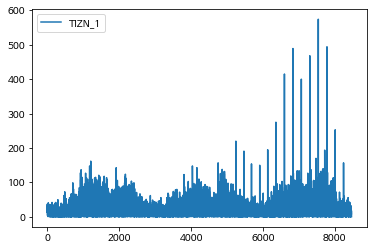

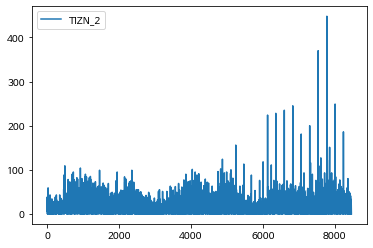

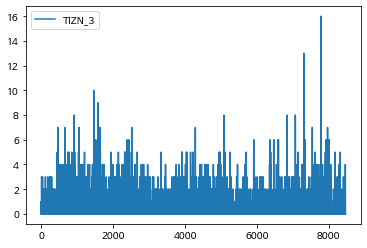

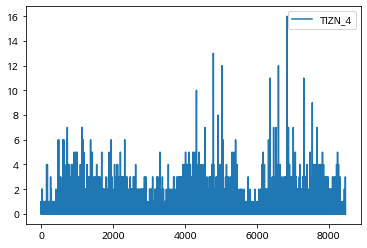

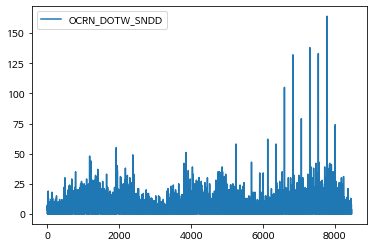

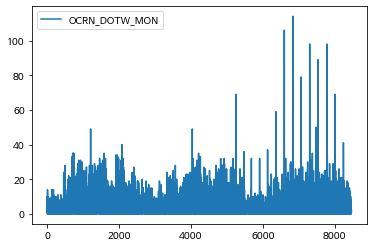

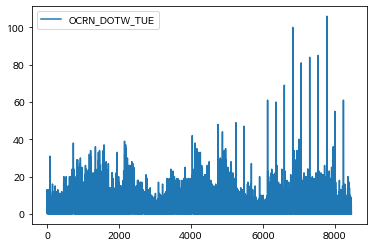

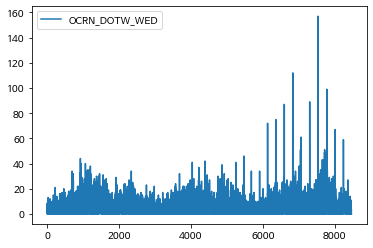

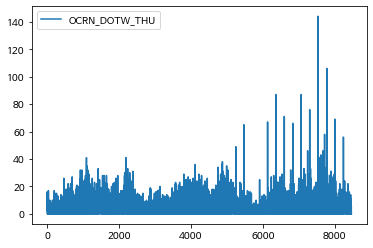

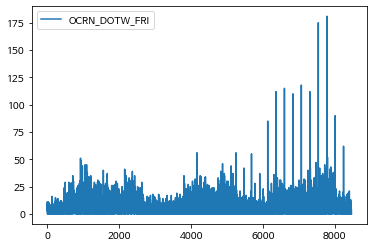

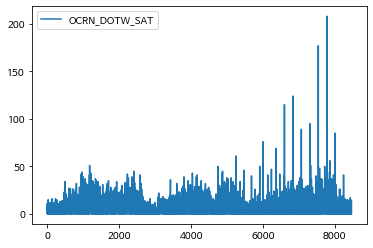

In [ ]:
df_byday1.plot()
df_byday2.plot()
df_byday3.plot()
df_byday4.plot()
df_byday5.plot()
df_byday6.plot()
df_byday7.plot()
df_byday8.plot()
df_byday9.plot()
df_byday10.plot()
df_byday11.plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


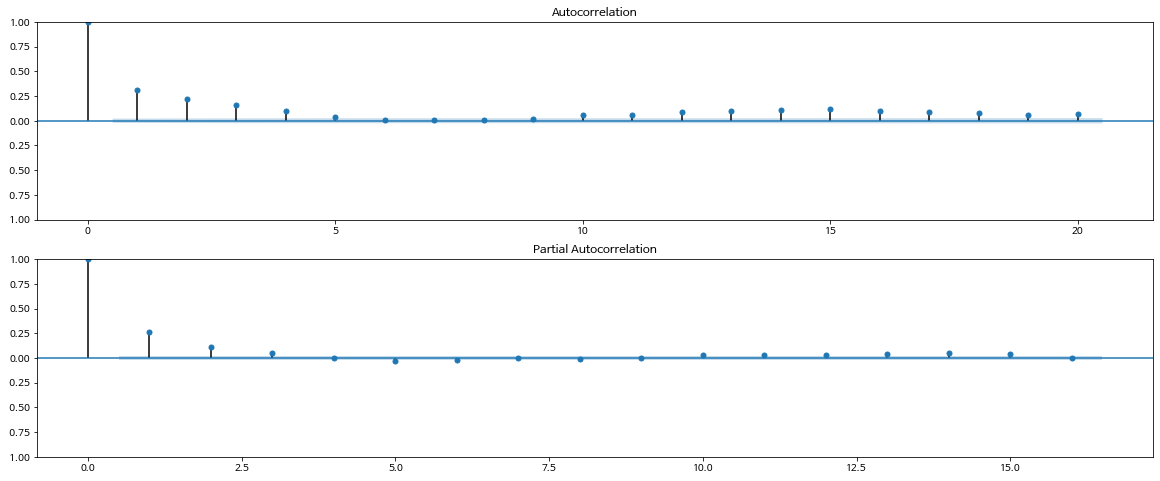

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_byday1[1:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_byday2[1:], lags=16, ax=ax2)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


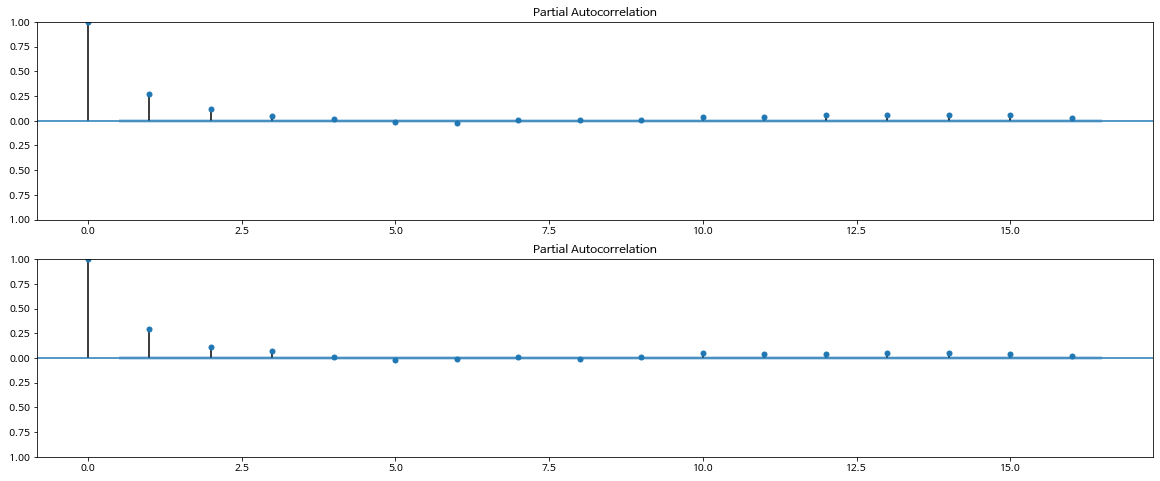

In [ ]:
fig = plt.figure(figsize=(20,8))
ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(df_byday10[1:], lags=16, ax=ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_byday11[1:], lags=16, ax=ax4)

In [ ]:
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
from sklearn import metrics

In [ ]:
# arima 모델로 예측하는 함수 만들기 [1] ~ [4]

def predict_arima(df, plcst_nm, column_nm) :
  df = df[df['PLCST_NM']==plcst_nm].groupby(['ACPT_YM']).mean()
  tgt_df = df[column_nm]

  #[1] 모델 만들기 - AIC 확인 
  model = pm.auto_arima(
          y=tgt_df,
          d=1, 
          D=None,
          start_p=0, max_p=3, 
          start_q=0, max_q=3, 
          m=1, seasonal=False, # 계절성이 없음!
          stepwise=True,
          trace=True)


  #[2] ARIMA 모델 훈련과 테스트 - TRAIN/TEST SET 분리 
 
  train_data, test_data = tgt_df[:int(len(tgt_df)*0.98)], tgt_df[int(len(tgt_df)*0.98):]
  print(len(train_data))
  print(len(test_data))


  #[3] TRAIN 모델 학습 
  model_fit = pm.auto_arima(
            y=train_data, 
            #d=n_diffs ,
            D=None, 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
  )


  #[4] FORECAST 함수 (MODEL) * PLOT 제외 
  # ARIMA 모델 훈련과 테스트 - test_data와 예측값 비교 * forcast 함수 및 예측값 그래프
  # forecast 함수
  def forecast_n_step(model, n = 1):
      fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
      # print("fc", fc,"conf_int", conf_int)
      print(type(fc.tolist()[0:n]))
      return (
          fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
    )

  def forecast(len, model, index, data=None):
      global y_pred
      y_pred = []
      pred_upper = []
      pred_lower = []

      if data is not None:
          for new_ob in data:
              fc, conf = forecast_n_step(model)
              y_pred.append(fc[0])
              pred_upper.append(conf[0][1])
              pred_lower.append(conf[0][0])
              model.update(new_ob)
      else:
          for i in range(len):
              fc, conf = forecast_n_step(model)
              y_pred.append(fc[0])
              pred_upper.append(conf[0][1])
              pred_lower.append(conf[0][0])
              model.update(fc[0])
      return pd.Series(y_pred, index=index), pred_upper, pred_lower

  fc = 0

  fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)
  print("forcasted one is ", fc)

  # pandas series 생성
  # fc # 예측결과
  lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
  upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

  #print( "lower_series : ", lower_series) 
  #print( "upper_series : ", upper_series)

 
  # rmse 값 
  rmse = np.sqrt(mean_squared_error(test_data, y_pred))
  print("RMSE : %F" %(rmse))
  #sdd = result['OCRN_DOTW_SNDD']
  #pred = result['preds']
  fc = np.round(fc, 0) 
  fc = np.array([fc]).item()
  #print("FC: "+fc+",rmse : "+ str(rmse) + ",r2 :"+str(r2))
  print("FC:",fc,",rmse :",rmse)
  return fc,rmse


#http://daplus.net/python-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%B3%80%EC%88%98%EA%B0%80-%EB%B0%B0%EC%97%B4%EC%9D%B8%EC%A7%80-%EB%98%90%EB%8A%94-%EC%8A%A4%EC%B9%BC%EB%9D%BC%EC%9D%B8%EC%A7%80-%EC%8B%9D%EB%B3%84%ED%95%98/

In [ ]:
predict_arima(df, '서울강서경찰서', 'RPRT_CASCNT_WHOL') # https://digital-play.tistory.com/31 # reshape(X.shape[0], -1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=371.410, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=373.391, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=373.385, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=369.438, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.311 seconds
35
1
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=450.395, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=372.713, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=374.645, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=374.630, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=376.623, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=366.339, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=380.200, Time=0.02

(126.0, 11.343081655282134)

In [ ]:
for plsct_nm in plsct_nm_list:
  if len(df[(df['PLCST_NM'] == plsct_nm) & (df['ACPT_YM'] == "2021-12-01")]) > 0:
    for time in time_list: 
      print(plsct_nm, time)
      fc,rmse,r2 = predict_arima(df, plsct_nm, time)
      df.loc[(df['PLCST_NM'] == plsct_nm) & (df['ACPT_YM'] == "2021-12-01"), time+'_PREDICT'] = fc
      df.loc[(df['PLCST_NM'] == plsct_nm) & (df['ACPT_YM'] == "2021-12-01"), time+'_rmse'] = rmse
    for day in day_list: 
       print(plsct_nm, day)
       fc,rmse,r2 = predict_arima(df, plsct_nm, day)
       df.loc[(df['PLCST_NM'] == plsct_nm) & (df['ACPT_YM'] == "2021-12-01"), day+'_PREDICT'] = fc
       df.loc[(df['PLCST_NM'] == plsct_nm) & (df['ACPT_YM'] == "2021-12-01"), day+'_rmse'] = rmse

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df

,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,OCRN_DOTW_MON,...,TIZN_2_rmse,TIZN_3_rmse,TIZN_4_rmse,OCRN_DOTW_SNDD_rmse,OCRN_DOTW_MON_rmse,OCRN_DOTW_TUE_rmse,OCRN_DOTW_WED_rmse,OCRN_DOTW_THU_rmse,OCRN_DOTW_FRI_rmse,OCRN_DOTW_SAT_rmse
0,0,2019-01-01,서울중랑경찰서,37,21,16,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
1,1,2019-01-01,서울노원경찰서,62,22,38,1,1,6,6,...,0,0,0,0,0,0,0,0,0,0
2,2,2019-01-01,부산해운대경찰서,37,13,24,0,0,3,5,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01,울산중부경찰서,56,37,19,0,0,7,6,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01,대구성서경찰서,24,18,6,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8460,2021-12-01,인천논현경찰서,39,18,20,0,1,8,1,...,0,0,0,0,0,0,0,0,0,0
8461,8461,2021-12-01,부산중부경찰서,19,12,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8462,8462,2021-12-01,대전서부경찰서,20,8,12,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
8463,8463,2021-12-01,함안경찰서,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'ACPT_YM', 'PLCST_NM', 'RPRT_CASCNT_WHOL', 'TIZN_1',
       'TIZN_2', 'TIZN_3', 'TIZN_4', 'OCRN_DOTW_SNDD', 'OCRN_DOTW_MON',
       'OCRN_DOTW_TUE', 'OCRN_DOTW_WED', 'OCRN_DOTW_THU', 'OCRN_DOTW_FRI',
       'OCRN_DOTW_SAT', 'ADDR', 'SI', 'SGG', 'LON', 'LAT', 'TIZN_1_PREDICT',
       'TIZN_2_PREDICT', 'TIZN_3_PREDICT', 'TIZN_4_PREDICT',
       'OCRN_DOTW_SNDD_PREDICT', 'OCRN_DOTW_MON_PREDICT',
       'OCRN_DOTW_TUE_PREDICT', 'OCRN_DOTW_WED_PREDICT',
       'OCRN_DOTW_THU_PREDICT', 'OCRN_DOTW_FRI_PREDICT',
       'OCRN_DOTW_SAT_PREDICT', 'TIZN_1_rmse', 'TIZN_2_rmse', 'TIZN_3_rmse',
       'TIZN_4_rmse', 'OCRN_DOTW_SNDD_rmse', 'OCRN_DOTW_MON_rmse',
       'OCRN_DOTW_TUE_rmse', 'OCRN_DOTW_WED_rmse', 'OCRN_DOTW_THU_rmse',
       'OCRN_DOTW_FRI_rmse', 'OCRN_DOTW_SAT_rmse'],
      dtype='object')

In [ ]:
df.to_csv('ARIMA_PREDICTED_V4.csv',encoding="euc-kr")

In [ ]:
df[df['ACPT_YM']=="2021-12-01"]

,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,OCRN_DOTW_MON,...,TIZN_2_rmse,TIZN_3_rmse,TIZN_4_rmse,OCRN_DOTW_SNDD_rmse,OCRN_DOTW_MON_rmse,OCRN_DOTW_TUE_rmse,OCRN_DOTW_WED_rmse,OCRN_DOTW_THU_rmse,OCRN_DOTW_FRI_rmse,OCRN_DOTW_SAT_rmse
8242,8242,2021-12-01,ETC,351,157,186,3,5,31,41,...,0,0,0,0,0,0,0,0,0,0
8243,8243,2021-12-01,천안동남경찰서,46,25,19,1,1,3,5,...,0,0,0,0,0,0,0,0,0,0
8244,8244,2021-12-01,화성동탄경찰서,49,30,18,1,0,2,11,...,0,0,0,0,0,0,0,0,0,0
8245,8245,2021-12-01,마산중부경찰서,5,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8246,8246,2021-12-01,울산중부경찰서,50,30,19,1,0,10,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8460,2021-12-01,인천논현경찰서,39,18,20,0,1,8,1,...,0,0,0,0,0,0,0,0,0,0
8461,8461,2021-12-01,부산중부경찰서,19,12,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8462,8462,2021-12-01,대전서부경찰서,20,8,12,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
8463,8463,2021-12-01,함안경찰서,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[df['ACPT_YM']=="2021-12-01"]

,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,OCRN_DOTW_MON,...,TIZN_2_rmse,TIZN_3_rmse,TIZN_4_rmse,OCRN_DOTW_SNDD_rmse,OCRN_DOTW_MON_rmse,OCRN_DOTW_TUE_rmse,OCRN_DOTW_WED_rmse,OCRN_DOTW_THU_rmse,OCRN_DOTW_FRI_rmse,OCRN_DOTW_SAT_rmse
8242,8242,2021-12-01,ETC,351,157,186,3,5,31,41,...,0,0,0,0,0,0,0,0,0,0
8243,8243,2021-12-01,천안동남경찰서,46,25,19,1,1,3,5,...,0,0,0,0,0,0,0,0,0,0
8244,8244,2021-12-01,화성동탄경찰서,49,30,18,1,0,2,11,...,0,0,0,0,0,0,0,0,0,0
8245,8245,2021-12-01,마산중부경찰서,5,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8246,8246,2021-12-01,울산중부경찰서,50,30,19,1,0,10,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8460,2021-12-01,인천논현경찰서,39,18,20,0,1,8,1,...,0,0,0,0,0,0,0,0,0,0
8461,8461,2021-12-01,부산중부경찰서,19,12,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8462,8462,2021-12-01,대전서부경찰서,20,8,12,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
8463,8463,2021-12-01,함안경찰서,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_f2 = df[df['ACPT_YM']=="2021-12-01"]

In [ ]:
df_f2.to_csv('ARIMA_PREDICTED_V5.csv',encoding="euc-kr")

In [ ]:
df_new = pd.read_csv("/content/ARIMA_PREDICTED_V5.csv", encoding="euc-kr") 

In [ ]:
df_new

,Unnamed: 0,Unnamed: 0.1,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,...,TIZN_2_rsq,TIZN_3_rsq,TIZN_4_rsq,OCRN_DOTW_SNDD_rsq,OCRN_DOTW_MON_rsq,OCRN_DOTW_TUE_rsq,OCRN_DOTW_WED_rsq,OCRN_DOTW_THU_rsq,OCRN_DOTW_FRI_rsq,OCRN_DOTW_SAT_rsq
0,8242,8242,2021-12-01,ETC,351,157,186,3,5,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8243,8243,2021-12-01,천안동남경찰서,46,25,19,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8244,8244,2021-12-01,화성동탄경찰서,49,30,18,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8245,8245,2021-12-01,마산중부경찰서,5,4,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8246,8246,2021-12-01,울산중부경찰서,50,30,19,1,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,8460,8460,2021-12-01,인천논현경찰서,39,18,20,0,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,8461,8461,2021-12-01,부산중부경찰서,19,12,7,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,8462,8462,2021-12-01,대전서부경찰서,20,8,12,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,8463,8463,2021-12-01,함안경찰서,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new["TIZN_1"]

0      157
1       25
2       30
3        4
4       30
      ... 
216     18
217     12
218      8
219      1
220      1
Name: TIZN_1, Length: 221, dtype: int64

In [ ]:
R2 = r2_score(df_new["TIZN_1"], df_new["TIZN_1_PREDICT"])
print(R2)

0.47290892582917987


In [ ]:
for i in ["TIZN_1", "TIZN_2", "TIZN_3", "TIZN_4","OCRN_DOTW_SNDD","OCRN_DOTW_MON","OCRN_DOTW_TUE","OCRN_DOTW_WED","OCRN_DOTW_THU","OCRN_DOTW_FRI","OCRN_DOTW_SAT"]:
  R2 = r2_score(df_new[i], df_new[i+"_PREDICT"])
  rmse = np.sqrt(mean_squared_error(df_new[i],  df_new[i+"_PREDICT"]))
  print(i+"_r2",R2)
  print(i+"_rmse",rmse)

TIZN_1_r2 0.47290892582917987
TIZN_1_rmse 11.242694963630779
TIZN_2_r2 0.7611334026068026
TIZN_2_rmse 8.447067016217558
TIZN_3_r2 -0.9074446048584521
TIZN_3_rmse 1.1155016321829005
TIZN_4_r2 -0.36774495527355966
TIZN_4_rmse 0.7337993857053428
OCRN_DOTW_SNDD_r2 -3.0331799260066203
OCRN_DOTW_SNDD_rmse 7.922417931563125
OCRN_DOTW_MON_r2 0.1891787635580593
OCRN_DOTW_MON_rmse 4.1851926005946725
OCRN_DOTW_TUE_r2 0.4662588988784405
OCRN_DOTW_TUE_rmse 3.8360047088991993
OCRN_DOTW_WED_r2 -0.18357815360209484
OCRN_DOTW_WED_rmse 6.316680496011159
OCRN_DOTW_THU_r2 0.6096896973325082
OCRN_DOTW_THU_rmse 3.5499028091978984
OCRN_DOTW_FRI_r2 -0.27186062779039877
OCRN_DOTW_FRI_rmse 6.346695438291122
OCRN_DOTW_SAT_r2 -1.6126733130748305
OCRN_DOTW_SAT_rmse 7.965138976441475


성능지표 
- 타임존 r^2 : TIZN_2
- 타임존 rmse : TIZN_1
- 요일별 r^2 : OCRN_DOTW_THU
- 요일별 rmse : OCRN_DOTW_SNDD


In [ ]:
df_new

,Unnamed: 0,Unnamed: 0.1,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,...,TIZN_2_rsq,TIZN_3_rsq,TIZN_4_rsq,OCRN_DOTW_SNDD_rsq,OCRN_DOTW_MON_rsq,OCRN_DOTW_TUE_rsq,OCRN_DOTW_WED_rsq,OCRN_DOTW_THU_rsq,OCRN_DOTW_FRI_rsq,OCRN_DOTW_SAT_rsq
0,8242,8242,2021-12-01,ETC,351,157,186,3,5,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8243,8243,2021-12-01,천안동남경찰서,46,25,19,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8244,8244,2021-12-01,화성동탄경찰서,49,30,18,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8245,8245,2021-12-01,마산중부경찰서,5,4,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8246,8246,2021-12-01,울산중부경찰서,50,30,19,1,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,8460,8460,2021-12-01,인천논현경찰서,39,18,20,0,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,8461,8461,2021-12-01,부산중부경찰서,19,12,7,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,8462,8462,2021-12-01,대전서부경찰서,20,8,12,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,8463,8463,2021-12-01,함안경찰서,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new_frame = df_new[["PLCST_NM","TIZN_2","TIZN_2_PREDICT"]]


In [ ]:
df_new_frame

,PLCST_NM,TIZN_2,TIZN_2_PREDICT
0,ETC,186,236
1,천안동남경찰서,19,25
2,화성동탄경찰서,18,36
3,마산중부경찰서,1,4
4,울산중부경찰서,19,39
...,...,...,...
216,인천논현경찰서,20,23
217,부산중부경찰서,7,19
218,대전서부경찰서,12,22
219,함안경찰서,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)
print(mpl.rcParams['font.family'])

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
df_new_frame = df_new_frame.set_index('PLCST_NM')

In [ ]:
df_new_frame2 = df_new[["PLCST_NM","OCRN_DOTW_THU","OCRN_DOTW_THU_PREDICT"]]

In [ ]:
df_new_frame2 = df_new_frame2.set_index('PLCST_NM')

In [ ]:
df_new_frame

,TIZN_2,TIZN_2_PREDICT
PLCST_NM,,
ETC,186,236
천안동남경찰서,19,25
화성동탄경찰서,18,36
마산중부경찰서,1,4
울산중부경찰서,19,39
...,...,...
인천논현경찰서,20,23
부산중부경찰서,7,19
대전서부경찰서,12,22


In [ ]:
df_new_frame2

,OCRN_DOTW_THU,OCRN_DOTW_THU_PREDICT
PLCST_NM,,
ETC,56,86
천안동남경찰서,6,4
화성동탄경찰서,8,11
마산중부경찰서,2,1
울산중부경찰서,5,11
...,...,...
인천논현경찰서,4,7
부산중부경찰서,6,4
대전서부경찰서,3,7


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

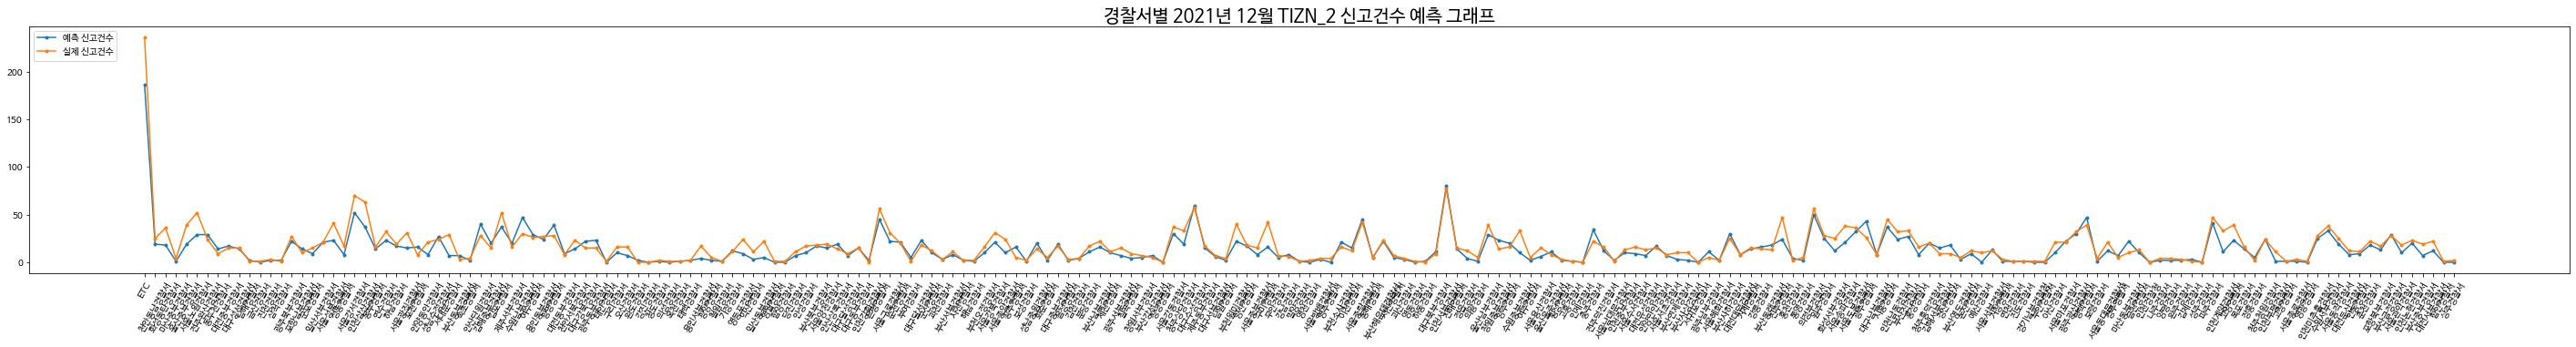

In [ ]:
plt.figure(figsize=(50, 5))
plt.plot(df_new_frame, marker = 'o', markersize = 3)
plt.legend(['예측 신고건수','실제 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("경찰서별 2021년 12월 TIZN_2 신고건수 예측 그래프", size = 20)

mpl.rc('axes', unicode_minus=False)

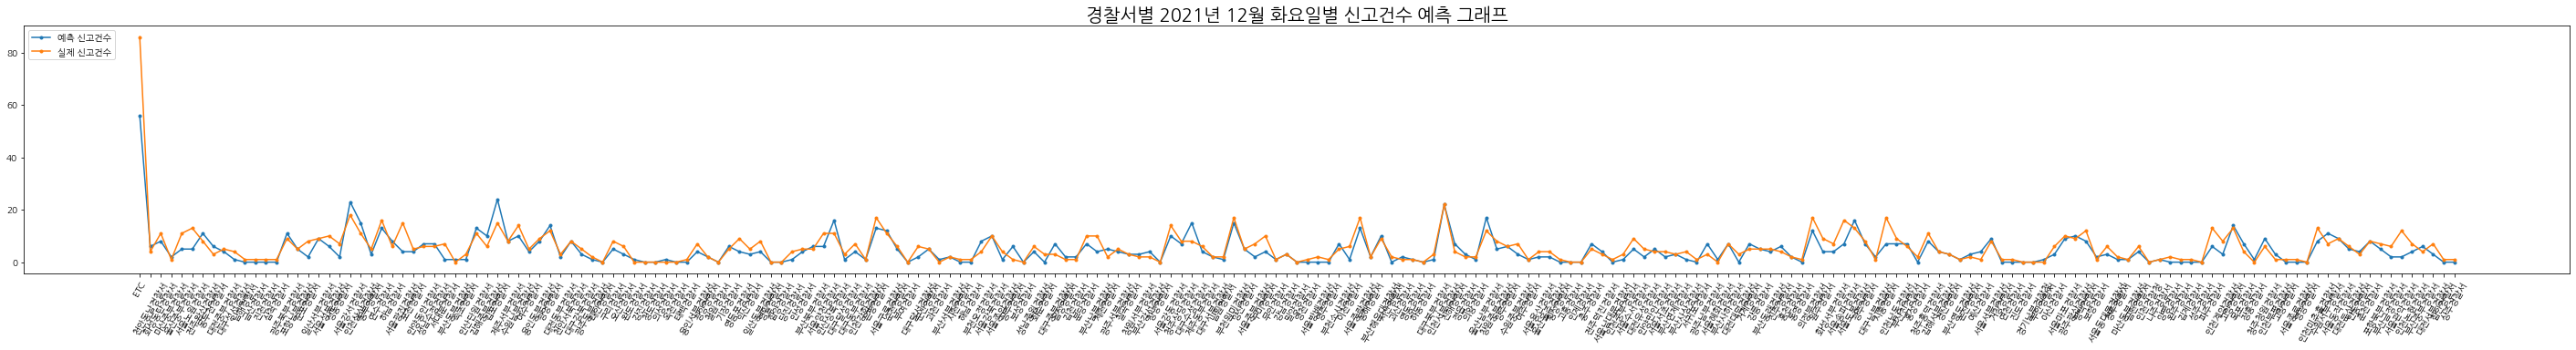

In [ ]:
plt.figure(figsize=(50, 5))
plt.plot(df_new_frame2, marker = 'o', markersize = 3)
plt.legend(['예측 신고건수','실제 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("경찰서별 2021년 12월 화요일별 신고건수 예측 그래프", size = 20)

mpl.rc('axes', unicode_minus=False)

In [ ]:
df_new_regin = pd.read_csv("/content/ARIMA_PREDICTED_V6.csv", encoding="euc-kr") 

In [ ]:
df_new_regin = df_new[["PLCST_NM","TIZN_2_PREDICT","LON","LAT"]]

In [ ]:
df_new_regin2 = df_new[["PLCST_NM","OCRN_DOTW_THU_PREDICT","LON","LAT"]]

In [ ]:
df_new_regin

,PLCST_NM,TIZN_2_PREDICT,LON,LAT
0,ETC,236,35.973544,126.713400
1,천안동남경찰서,25,36.786847,127.156057
2,화성동탄경찰서,36,37.207494,127.077416
3,마산중부경찰서,4,35.192208,128.564082
4,울산중부경찰서,39,35.569829,129.349217
...,...,...,...,...
216,인천논현경찰서,23,37.404077,126.715039
217,부산중부경찰서,19,35.107421,129.035924
218,대전서부경찰서,22,36.309045,127.373459
219,함안경찰서,1,35.279147,128.410910


In [ ]:
df_new_regin2

,PLCST_NM,OCRN_DOTW_THU_PREDICT,LON,LAT
0,ETC,86,35.973544,126.713400
1,천안동남경찰서,4,36.786847,127.156057
2,화성동탄경찰서,11,37.207494,127.077416
3,마산중부경찰서,1,35.192208,128.564082
4,울산중부경찰서,11,35.569829,129.349217
...,...,...,...,...
216,인천논현경찰서,7,37.404077,126.715039
217,부산중부경찰서,4,35.107421,129.035924
218,대전서부경찰서,7,36.309045,127.373459
219,함안경찰서,1,35.279147,128.410910


In [ ]:
df_new_regin.isna().sum()

PLCST_NM          0
TIZN_2_PREDICT    0
LON               0
LAT               0
dtype: int64

In [ ]:
df_new_regin2.isna().sum()

PLCST_NM                 0
OCRN_DOTW_THU_PREDICT    0
LON                      0
LAT                      0
dtype: int64

In [ ]:
import requests

In [ ]:
df_new_regin.loc[202] 

PLCST_NM             청주청원경찰서
TIZN_2_PREDICT            24
LON                34.818444
LAT               126.469569
Name: 202, dtype: object

In [ ]:
#df.loc[df["product_group"]!="PG2", "price"] = df.loc[df["product_group"]!="PG2", "price"] * 0.5
df_new_regin.loc[202,'LON'] = 34.818444
df_new_regin.loc[202,'LAT'] = 126.469569
df_new_regin2.loc[202,'LON'] = 34.818444
df_new_regin2.loc[202,'LAT'] = 126.469569

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_new_regin.loc[202]

PLCST_NM             청주청원경찰서
TIZN_2_PREDICT            24
LON                34.818444
LAT               126.469569
Name: 202, dtype: object

In [ ]:
df_new_regin2.loc[202]

PLCST_NM                    청주청원경찰서
OCRN_DOTW_THU_PREDICT             6
LON                       34.818444
LAT                      126.469569
Name: 202, dtype: object

In [ ]:
df_new_regin

,PLCST_NM,TIZN_2_PREDICT,LON,LAT
0,ETC,236,35.973544,126.713400
1,천안동남경찰서,25,36.786847,127.156057
2,화성동탄경찰서,36,37.207494,127.077416
3,마산중부경찰서,4,35.192208,128.564082
4,울산중부경찰서,39,35.569829,129.349217
...,...,...,...,...
216,인천논현경찰서,23,37.404077,126.715039
217,부산중부경찰서,19,35.107421,129.035924
218,대전서부경찰서,22,36.309045,127.373459
219,함안경찰서,1,35.279147,128.410910


In [ ]:
df_new_regin.reset_index(inplace = True)

df_new_regin = df_new_regin.rename(columns={"PLCST_NM":"경찰서",'TIZN_2_PREDICT':'preds','LON':'LAT', 'LAT':'LON'})
df_new_regin

,index,경찰서,preds,LAT,LON
0,0,ETC,236,35.973544,126.713400
1,1,천안동남경찰서,25,36.786847,127.156057
2,2,화성동탄경찰서,36,37.207494,127.077416
3,3,마산중부경찰서,4,35.192208,128.564082
4,4,울산중부경찰서,39,35.569829,129.349217
...,...,...,...,...,...
216,216,인천논현경찰서,23,37.404077,126.715039
217,217,부산중부경찰서,19,35.107421,129.035924
218,218,대전서부경찰서,22,36.309045,127.373459
219,219,함안경찰서,1,35.279147,128.410910


In [ ]:
df_new_regin2.reset_index(inplace = True)

df_new_regin2 = df_new_regin2.rename(columns={"PLCST_NM":"경찰서",'OCRN_DOTW_THU_PREDICT':'preds','LON':'LAT', 'LAT':'LON'})
df_new_regin2

,index,경찰서,preds,LAT,LON
0,0,ETC,86,35.973544,126.713400
1,1,천안동남경찰서,4,36.786847,127.156057
2,2,화성동탄경찰서,11,37.207494,127.077416
3,3,마산중부경찰서,1,35.192208,128.564082
4,4,울산중부경찰서,11,35.569829,129.349217
...,...,...,...,...,...
216,216,인천논현경찰서,7,37.404077,126.715039
217,217,부산중부경찰서,4,35.107421,129.035924
218,218,대전서부경찰서,7,36.309045,127.373459
219,219,함안경찰서,1,35.279147,128.410910


In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
map = folium.Map(location = [36,127], zoom_start = 9)

In [ ]:
map2 = folium.Map(location = [36,127], zoom_start = 9)

In [ ]:
df_new_regin['LON']

0      126.713400
1      127.156057
2      127.077416
3      128.564082
4      129.349217
          ...    
216    126.715039
217    129.035924
218    127.373459
219    128.410910
220    128.161917
Name: LON, Length: 221, dtype: float64

In [ ]:
for i in df_new_regin.index:
  name = df_new_regin.loc[i, "경찰서"]
  lat = df_new_regin.loc[i, "LAT"]
  lon = df_new_regin.loc[i, "LON"]
  folium.CircleMarker(location=[df_new_regin['LAT'][i],df_new_regin['LON'][i]], radius= df_new_regin['preds'][i].astype(np.float64)/5, color='#FF0000', fill=True).add_to(map)



In [ ]:
for i in df_new_regin2.index:
  name = df_new_regin2.loc[i, "경찰서"]
  lat = df_new_regin2.loc[i, "LAT"]
  lon = df_new_regin2.loc[i, "LON"]
  folium.CircleMarker(location=[df_new_regin2['LAT'][i],df_new_regin2['LON'][i]], radius= df_new_regin2['preds'][i].astype(np.float64)/5, color='#FF0000', fill=True).add_to(map2)

In [ ]:
map
#시간대별

In [ ]:
map2
#요일별 : 화요일